# Lecture 11

For the next few lectures, we are going to work on a basic data analysis problem: grading a class. We will first use pandas to compute grades. Then we will build a grading book system.

## Data Analysis (scripting/notebook)

### Data Preperation
We'll use pandas to read in some grade data. The file we are reading is a CSV dump of a Google Sheet from a TA grading a course. As we soon will see, the file is not properly formatted, and as often is the case, we will have to do a bit of manipulation before the data is usably in memory.

In [2]:
import pandas as pd

In [3]:
# Unix command; ! starts a new shell and runs a list (ls) of what is in the file and the - makes it readable
!ls -ln

total 712
-rw-r--r--  1 501  20    8654 Sep 30 13:22 Data-1401-Grades-Fixed.csv
-rw-r--r--  1 501  20    8953 Sep 30 11:55 Data-1401-Grades.csv
-rw-r--r--  1 501  20  298872 Sep 30 14:10 Lecture.11.ipynb
-rw-r--r--  1 501  20   38355 Sep 30 11:55 Lecture.11.pdf


Before we read in the file, lets take a look.

In [5]:
# looks at the file itself
!cat Data-1401-Grades.csv

"No attempt: -5,wrong:-1...-5","No attempt: -5, wrong: -2","No attempt: -10, wrong: -1..-7","No attempt: -10, wrong: -1 ..-8. no bonus","No attempt: -25, wrong: -1..-20","No attempt: -14, wrong: -1..-12, bonus 0..14","No attempt: -15, wrong: -1..-12, bonus 0..5","No attempt: -14, wrong: -1..-12",
Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,,Lab 7,Exam 2
,0,0,,0,0,0,0,0
no solution,no solution,-did not submit the Lab,,did not submit the exam,,,,
100,96,46,,68-sent,,,,
Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return

### Data Manipulation with Command-line Tools and Pandas

The file is the CSV export of a google sheet, which isn't ideally formatted:

* First line is the grading rubric, not the column names.
* Lines alternate between the grade and the comments for the specific lab/exam.
* The exam grades are in the format XX-sent.

Reading the file with a CSV reader therefore isn't going to get table in the right format:

In [7]:
# Puts our data into an object to call
df = pd.read_csv("Data-1401-Grades.csv")

In [8]:
df

,"No attempt: -5,wrong:-1...-5","No attempt: -5, wrong: -2","No attempt: -10, wrong: -1..-7","No attempt: -10, wrong: -1 ..-8. no bonus","No attempt: -25, wrong: -1..-20","No attempt: -14, wrong: -1..-12, bonus 0..14","No attempt: -15, wrong: -1..-12, bonus 0..5","No attempt: -14, wrong: -1..-12",Unnamed: 8
0,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,NaN,Lab 7,Exam 2
1,NaN,0,0,NaN,0,0,0.0,0,0
2,no solution,no solution,-did not submit the Lab,NaN,did not submit the exam,NaN,NaN,NaN,NaN
3,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
4,Completed the lab,"ex4- attempted,wrong solution -2\nex8 -wrong s...",ex1 - Nameerror get_size() is not defined(-2)\...,NaN,q1c - does not return the list instead returns...,NaN,NaN,NaN,NaN
5,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
6,Completed the lab,Completed the whole lab\n,ex10 - not attempted (-10)\nex11 - not attempted,ex8-not attempted\nex9- not attempted,note - try to use better variable names\nq3b -...,NaN,NaN,NaN,NaN
7,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
8,"ex4 - attempted, wrong answer(-2)\nex5c - not ...",Completed the whole lab,"ex2 - returns 1 for winner_2, returns 1 for no...",NaN,note- try not to use names which are built-in ...,NaN,NaN,NaN,NaN
9,0,81,0,0,43-sent,NaN,NaN,NaN,NaN


Let's start fixing these issues. First we can just drop the first line. There are lots of ways of doing so... easiest would be to use some of the command line unix utilities we became familiar with in the beginning of the course. First let's count the lines:

In [10]:
# There are 179 lines after the first line (the rubric)
!wc -l Data-1401-Grades.csv

     179 Data-1401-Grades.csv


We can use the unix command `tail` to write out the last $n$ lines of a file... let's use it to drop the first line:

In [12]:
# Only takes 179 lines after the first line
!tail -179 Data-1401-Grades.csv

Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,,Lab 7,Exam 2
,0,0,,0,0,0,0,0
no solution,no solution,-did not submit the Lab,,did not submit the exam,,,,
100,96,46,,68-sent,,,,
Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return the list instead returns the range(-5)
q2 - output is wrong, output should had been [4, 5, 60], 
[8, 10, 120],[12, 15, 180] (-5)
q3a - should be in a list format (-2)
q3b - Just generated the histogram.output does not have x90 value.(-10)
q4a - should return the highest card instead of True for f

We can use unix redirection to write the output into another file:

In [14]:
# Puts our modified data into a new file
!tail -179 Data-1401-Grades.csv > Data-1401-Grades-Fixed.csv

Let's see the result:

In [16]:
!cat Data-1401-Grades-Fixed.csv

Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,,Lab 7,Exam 2
,0,0,,0,0,0,0,0
no solution,no solution,-did not submit the Lab,,did not submit the exam,,,,
100,96,46,,68-sent,,,,
Completed the lab,"ex4- attempted,wrong solution -2
ex8 -wrong solution(sequence not correct) -2","ex1 - Nameerror get_size() is not defined(-2)
ex2 - returns -1 for all conditions, does not test for all conditions.(-3)
ex3 - does not construct board(-5)
ex4 - does not construct the board (-5)
ex5 - does not construct the board (-5)
ex6 - does not construct the board (-5)
ex7 - no construction of board (-5)
ex8-not attempted
ex9-not attempted
ex10 - does not create board for 5*5 (-4)
ex11 - not attempted ",,"q1c - does not return the list instead returns the range(-5)
q2 - output is wrong, output should had been [4, 5, 60], 
[8, 10, 120],[12, 15, 180] (-5)
q3a - should be in a list format (-2)
q3b - Just generated the histogram.output does not have x90 value.(-10)
q4a - should return the highest card instead of True for f

Let's try reading the new file now:

In [18]:
df = pd.read_csv("Data-1401-Grades-Fixed.csv")

In [19]:
df

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0
1,no solution,no solution,-did not submit the Lab,NaN,did not submit the exam,NaN,NaN,NaN,NaN
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
3,Completed the lab,"ex4- attempted,wrong solution -2\nex8 -wrong s...",ex1 - Nameerror get_size() is not defined(-2)\...,NaN,q1c - does not return the list instead returns...,NaN,NaN,NaN,NaN
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
5,Completed the lab,Completed the whole lab\n,ex10 - not attempted (-10)\nex11 - not attempted,ex8-not attempted\nex9- not attempted,note - try to use better variable names\nq3b -...,NaN,NaN,NaN,NaN
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
7,"ex4 - attempted, wrong answer(-2)\nex5c - not ...",Completed the whole lab,"ex2 - returns 1 for winner_2, returns 1 for no...",NaN,note- try not to use names which are built-in ...,NaN,NaN,NaN,NaN
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN
9,no solution,ex2-attempted(empty list) -2\nex3 - no solutio...,- did not submit the lab,-did not submit the lab,q1b - returns the index 0 instead of 23 as men...,NaN,NaN,NaN,NaN


Now we have to deal with the problem that every other line contains information we don't need. For example:

In [21]:
df["Lab 1"]

0                                                   NaN
1                                           no solution
2                                                   100
3                                     Completed the lab
4                                                   100
5                                     Completed the lab
6                                                    93
7     ex4 - attempted, wrong answer(-2)\nex5c - not ...
8                                                     0
9                                           no solution
10                                                   95
11                  -ex5c missing(-5)                  
12                                                  100
13                                    completed the lab
14                                                   95
15                                    -ex5c missing(-5)
16                                                   95
17                                    -ex5c miss

The data is now in memory stored as a data frame. Let's take a few minutes and go over the features of DataFrame from the Pandas documentation:

* [Pandas Data Structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)
* [Pandas DataFrame in 10 minutes](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

We can deal with the "every-other-line" problem by using Pandas to create a new DataFrame from select row of our existing DataFrame using boolean indexing. Basically if you use index a DataFrame with a list of booleans with the same length as the number of rows in the DataFrame, it'll use the booleans to select the rows. So we need a list containing of alternating True/False booleans:

In [24]:
mask=list()
for i in range(16):
    mask.append(True)
    mask.append(False)
mask

[True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False]

In [25]:
df_0=df[mask]

In [26]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN
14,95,98,50,NaN,52,NaN,NaN,NaN,NaN
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN


Next, we have to fix the "Exam 1" column and remove "-sent" from it. Here's the plan:

1. Ask DataFrame for the column.
1. Convert Column into a list.
1. Fix every item of the list
    1. Remove "-sent"
    1. Convert to int (from string)
1. Add back the fixed list as a new column.

In [28]:
# 1
df_0["Exam 1"]

0            0
2      68-sent
4      88-sent
6      96-sent
8      43-sent
10     96-sent
12     89-sent
14          52
16    100-sent
18          67
20           0
22     66-sent
24     96-sent
26     64-sent
28     64-sent
30     98-sent
Name: Exam 1, dtype: object

In [29]:
# 2
df_0["Exam 1"].tolist()

['0',
 '68-sent',
 '88-sent',
 '96-sent',
 '43-sent',
 '96-sent',
 '89-sent',
 '52',
 '100-sent',
 '67',
 '0',
 '66-sent',
 '96-sent',
 '64-sent',
 '64-sent',
 '98-sent']

In [30]:
# 3A
list(map(lambda x: x.split("-")[0] ,df_0["Exam 1"].tolist()))

['0',
 '68',
 '88',
 '96',
 '43',
 '96',
 '89',
 '52',
 '100',
 '67',
 '0',
 '66',
 '96',
 '64',
 '64',
 '98']

In [31]:
# 3B
list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))

[0, 68, 88, 96, 43, 96, 89, 52, 100, 67, 0, 66, 96, 64, 64, 98]

In [32]:
# 4
df_0["Exam 1 Fixed"] = list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))

/var/folders/sx/gp_6ygy12pscq43d89n6rz8c0000gn/T/ipykernel_11958/1933185559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["Exam 1 Fixed"] = list(map(lambda x: int(x.split("-")[0]) ,df_0["Exam 1"].tolist()))


We finally have the exam data in a `DataFrame` in a way we can use it: 

In [34]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0,0
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN,68
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN,88
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN,96
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN,43
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN,96
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN,89
14,95,98,50,NaN,52,NaN,NaN,NaN,NaN,52
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN,100
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN,67


### Data Visualization / Analysis

First thing, make a histogram:

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 2., 2., 1., 0., 0., 0., 0., 0., 0.,
        0., 2., 0., 0., 3., 2.]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
         67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
         90. ,  92.5,  95. ,  97.5, 100. ]),
 <BarContainer object of 40 artists>)

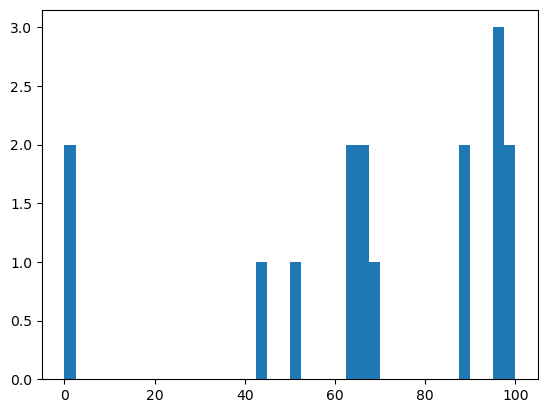

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df_0["Exam 1 Fixed"],bins=40)

In [38]:
df_0["Exam 1 Fixed"]

0       0
2      68
4      88
6      96
8      43
10     96
12     89
14     52
16    100
18     67
20      0
22     66
24     96
26     64
28     64
30     98
Name: Exam 1 Fixed, dtype: int64

In [39]:
import numpy as np
print("Mean:",np.mean(df_0["Exam 1 Fixed"]))
print("Std:",np.std(df_0["Exam 1 Fixed"]))

Mean: 67.9375
Std: 30.906044615091073


The mean/standard deviation is being pulled down/wide by the low grades, lets take them out using selection. Note that applying conditionals to DataFrames and Series give you back a boolean Series:

In [41]:
min_exam_1=55
df_0["Exam 1 Fixed"]>min_exam_1

0     False
2      True
4      True
6      True
8     False
10     True
12     True
14    False
16     True
18     True
20    False
22     True
24     True
26     True
28     True
30     True
Name: Exam 1 Fixed, dtype: bool

In [42]:
exam_1_df=df_0[df_0["Exam 1 Fixed"]>min_exam_1]

In [43]:
exam_1_df

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN,68
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN,88
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN,96
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN,96
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN,89
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN,100
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN,67
22,95,89,0,0,66-sent,NaN,NaN,NaN,NaN,66
24,98,94,35,NaN,96-sent,NaN,NaN,NaN,NaN,96
26,93,77,23,NaN,64-sent,NaN,NaN,NaN,NaN,64


Now lets look at the new mean/sigma:

In [45]:
print("Mean:",np.mean(exam_1_df["Exam 1 Fixed"]))
print("Std:",np.std(exam_1_df["Exam 1 Fixed"]))

Mean: 82.66666666666667
Std: 14.642024753731599


### Grading Schemes

Now that we have our data in a useable data structure, we can start our analysis... first thing, lets look at the distribution:

(array([4., 1., 0., 0., 0., 0., 2., 0., 3., 2.]),
 array([ 64. ,  67.6,  71.2,  74.8,  78.4,  82. ,  85.6,  89.2,  92.8,
         96.4, 100. ]),
 <BarContainer object of 10 artists>)

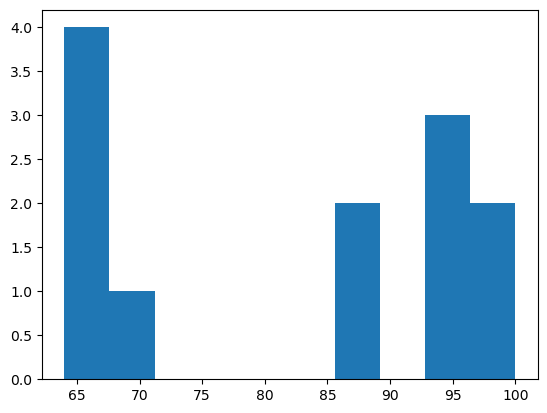

In [47]:
plt.hist(exam_1_df["Exam 1 Fixed"])

In [48]:
print("Mean:",np.mean(exam_1_df["Exam 1 Fixed"]))
print("Std:",np.std(exam_1_df["Exam 1 Fixed"]))

Mean: 82.66666666666667
Std: 14.642024753731599


Now lets apply the some grade boundries to assign letter grades... we'll talk about how we established such boundries in a bit. The point is to assign a approriate number of As, Bs, etc. To determine if the letter grade distribution is acceptable, lets count:

In [50]:
grades = df_0["Exam 1 Fixed"].tolist()

def in_range(a,b):
    return lambda x: x<b and x>=a

print("Number of As:",len(list(filter(in_range(90.,101.),grades))))
print("Number of Bs:",len(list(filter(in_range(80.,90.),grades))))
print("Number of Cs:",len(list(filter(in_range(64.,80.),grades))))
print("Number of Ds:",len(list(filter(in_range(50.,64.),grades))))
print("Number of Fs:",len(list(filter(in_range(0.,50.),grades))))

Number of As: 5
Number of Bs: 2
Number of Cs: 5
Number of Ds: 1
Number of Fs: 3


In [51]:
def in_range(a,b):
    def func(x):        
        return x<b and x>=a
    return func

Example of counting using Pandas:

In [53]:
sum(np.logical_and(df_0["Exam 1 Fixed"]>90. , df_0["Exam 1 Fixed"]<101.))

5

We can accomplish the same counting using a histogram:

In [55]:
np.histogram(df_0["Exam 1 Fixed"],bins=[0,50,64,80,90,101])

(array([3, 1, 5, 2, 5]), array([  0,  50,  64,  80,  90, 101]))

(array([3., 1., 5., 2., 5.]),
 array([  0.,  50.,  64.,  80.,  90., 101.]),
 <BarContainer object of 5 artists>)

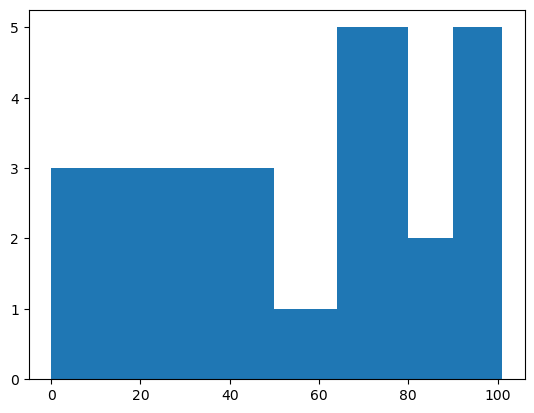

In [56]:
plt.hist(df_0["Exam 1 Fixed"],bins=[0,50,64,80,90,101])

There were many steps to what we did above... let's try to put it together into a function we reuse to also grade  labs and other exams. 

First, let's create a data structure to store the grade boundries, for example:

In [58]:
grades_0={"A+":100,
          "A":90,
          "B":80, 
          "C":64,
          "D":50,
          "F":0 }

In [59]:
grades_0

{'A+': 100, 'A': 90, 'B': 80, 'C': 64, 'D': 50, 'F': 0}

Might be useful to have the inverse map too:

In [61]:
# Reversing the keys and values
grades_inverse=dict(zip(grades_0.values(),grades_0.keys()))

In [62]:
grades_inverse

{100: 'A+', 90: 'A', 80: 'B', 64: 'C', 50: 'D', 0: 'F'}

In [63]:
grades_0.values()

dict_values([100, 90, 80, 64, 50, 0])

One problem is that python dictionaries are not guaranteed to keep the order, and we are implying that the order matters. Instead we can use an `OrderedDict`:

In [65]:
from collections import OrderedDict 

In [66]:
# Keeps our dictionary in order so everything remains the same
grades_inverse=OrderedDict(zip(list(grades_0.values())[::-1],
                               list(grades_0.keys())[::-1]))

In [67]:
grades_inverse

OrderedDict([(0, 'F'),
             (50, 'D'),
             (64, 'C'),
             (80, 'B'),
             (90, 'A'),
             (100, 'A+')])

In [68]:
grades=OrderedDict(zip(list(grades_0.keys())[::-1],
                       list(grades_0.values())[::-1]))

In [69]:
grades

OrderedDict([('F', 0),
             ('D', 50),
             ('C', 64),
             ('B', 80),
             ('A', 90),
             ('A+', 100)])

In [70]:
np.histogram(df_0["Exam 1 Fixed"],bins=list(grades.values()))

(array([3, 1, 5, 2, 5]), array([  0,  50,  64,  80,  90, 100]))

(array([3., 1., 5., 2., 5.]),
 array([  0.,  50.,  64.,  80.,  90., 100.]),
 <BarContainer object of 5 artists>)

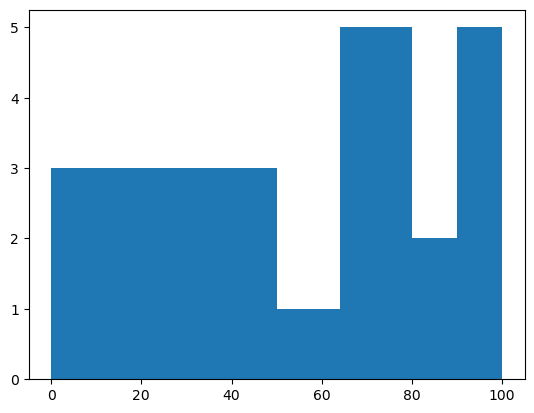

In [71]:
plt.hist(df_0["Exam 1 Fixed"],bins=list(grades.values()))

Now we can write the function:

In [73]:
def grade_summary(df_0,grades,min_grade=0.):
    # Grade boundary
    df=df_0[df_0>min_grade]
    N_total=sum(df>min_grade)
    hist,bins=np.histogram(df,bins=list(grades.values()))

    print("Mean:",np.mean(df))
    print("Std:",np.std(df))
    
    for grade_letter,bin_count in zip(grades.keys(),hist):
        print(grade_letter+": "+str(bin_count),
              float(bin_count/N_total) )
    

In [74]:
grade_summary(df_0["Exam 1 Fixed"],grades)

Mean: 77.64285714285714
Std: 18.38713503224136
F: 1 0.07142857142857142
D: 1 0.07142857142857142
C: 5 0.35714285714285715
B: 2 0.14285714285714285
A: 5 0.35714285714285715


In [75]:
grade_summary(df_0["Exam 1 Fixed"],grades,55)

Mean: 82.66666666666667
Std: 14.642024753731599
F: 0 0.0
D: 0 0.0
C: 5 0.4166666666666667
B: 2 0.16666666666666666
A: 5 0.4166666666666667


In [76]:
grades_1= OrderedDict([('F', 0),
              ('D', 60),
              ('C', 70),
              ('B', 80),
              ('A', 90),
              ('A+', 100)])


grade_summary(df_0["Exam 1 Fixed"],grades)

Mean: 77.64285714285714
Std: 18.38713503224136
F: 1 0.07142857142857142
D: 1 0.07142857142857142
C: 5 0.35714285714285715
B: 2 0.14285714285714285
A: 5 0.35714285714285715


How about something that implements a bell curve?

In [78]:
def compute_curve(df_0, min_grade=None):

    if min_grade:
        pass
    else:
        min_grade=np.max(df_0)/2.
    
    print("Min grade:",min_grade)

    df=df_0[df_0>min_grade]
    N_total=sum(df_0>min_grade)
    
    print("N Total (post cut):",N_total)
    print("N Total (pre cut):",df_0.shape)
    
    mean=np.mean(df)
    std=np.std(df)

    print("Mean:",mean)
    print("Std:",std)
    
    grade_def=[("A+",np.max(df)),
               ("A", min(np.max(df),mean+std)),
               ("B",mean), 
               ("C",mean-std),
               ("D",mean-2*std),
               ("F",0.)]
    
    grade_def.reverse()
    grades=OrderedDict( grade_def )
    
    
    hist,bins=np.histogram(df,bins=list(grades.values()))
    
    _=plt.hist(df)
    plt.show()
    
    for grade_letter,bin_count,min_grade in zip(grades.keys(),hist,grades.values()):
        print("{:2.2f}".format(min_grade),
              grade_letter+": "+str(bin_count),
              "{:2.2f}%".format(100.*float(bin_count/N_total)) )
    return grades

Min grade: 50.0
N Total (post cut): 13
N Total (pre cut): (16,)
Mean: 80.3076923076923
Std: 16.268821598782676


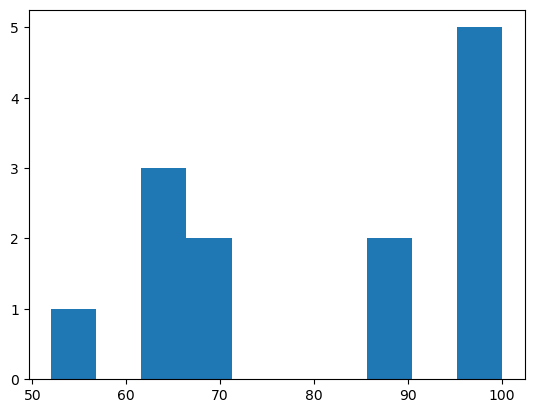

0.00 F: 0 0.00%
47.77 D: 3 23.08%
64.04 C: 3 23.08%
80.31 B: 5 38.46%
96.58 A: 2 15.38%


OrderedDict([('F', 0.0),
             ('D', 47.770049110126955),
             ('C', 64.03887070890963),
             ('B', 80.3076923076923),
             ('A', 96.57651390647499),
             ('A+', 100)])

In [79]:
compute_curve(df_0["Exam 1 Fixed"],50.)

How about the labs? 

First lets turn the `NaN`s into `0`s:

In [81]:
df_0

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,NaN,0,0,NaN,0,0.0,0.0,0.0,0.0,0
2,100,96,46,NaN,68-sent,NaN,NaN,NaN,NaN,68
4,100,100,90,NaN,88-sent,NaN,NaN,NaN,NaN,88
6,93,100,24,NaN,96-sent,NaN,NaN,NaN,NaN,96
8,0,81,0,0,43-sent,NaN,NaN,NaN,NaN,43
10,95,100,105,NaN,96-sent,NaN,NaN,NaN,NaN,96
12,100,98,87,NaN,89-sent,NaN,NaN,NaN,NaN,89
14,95,98,50,NaN,52,NaN,NaN,NaN,NaN,52
16,95,96,98,NaN,100-sent,NaN,NaN,NaN,NaN,100
18,0,78,37,NaN,67,NaN,NaN,NaN,NaN,67


In [82]:
df_1=df_0.fillna(0)

In [83]:
df_1

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,100,96,46,0,68-sent,0.0,0.0,0.0,0.0,68
4,100,100,90,0,88-sent,0.0,0.0,0.0,0.0,88
6,93,100,24,0,96-sent,0.0,0.0,0.0,0.0,96
8,0,81,0,0,43-sent,0.0,0.0,0.0,0.0,43
10,95,100,105,0,96-sent,0.0,0.0,0.0,0.0,96
12,100,98,87,0,89-sent,0.0,0.0,0.0,0.0,89
14,95,98,50,0,52,0.0,0.0,0.0,0.0,52
16,95,96,98,0,100-sent,0.0,0.0,0.0,0.0,100
18,0,78,37,0,67,0.0,0.0,0.0,0.0,67


In [84]:
list(map(type,df_1["Lab 1"]))

[int,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str]

Lab 1
Min grade: 50.0
N Total (post cut): 12
N Total (pre cut): (16,)
Mean: 96.58333333333333
Std: 2.6912925436591904


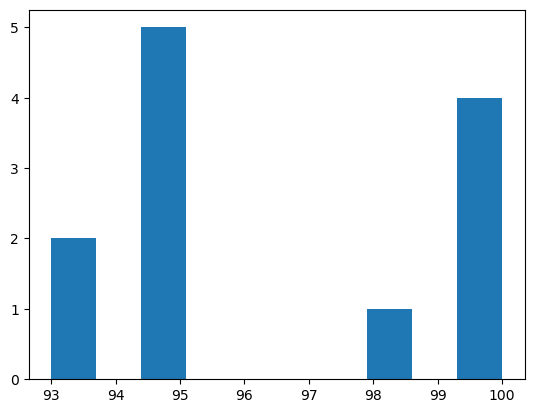

0.00 F: 0 0.00%
91.20 D: 2 16.67%
93.89 C: 5 41.67%
96.58 B: 1 8.33%
99.27 A: 4 33.33%
Lab 2
Min grade: 50.0
N Total (post cut): 15
N Total (pre cut): (16,)
Mean: 91.53333333333333
Std: 8.655377262462657


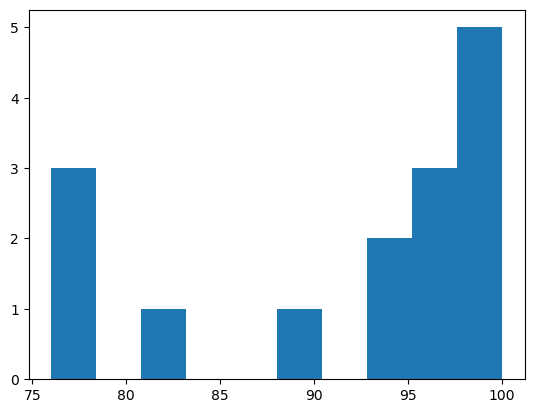

0.00 F: 0 0.00%
74.22 D: 4 26.67%
82.88 C: 1 6.67%
91.53 B: 7 46.67%
100.00 A: 3 20.00%
Lab 3
Min grade: 52.5
N Total (post cut): 6
N Total (pre cut): (16,)
Mean: 88.0
Std: 14.011899704655802


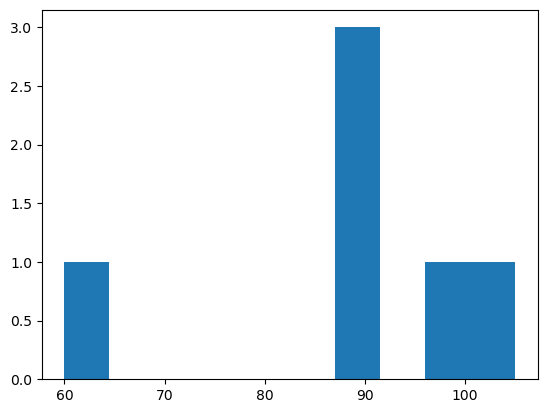

0.00 F: 0 0.00%
59.98 D: 1 16.67%
73.99 C: 1 16.67%
88.00 B: 3 50.00%
102.01 A: 1 16.67%


In [85]:
for name in ["Lab 1","Lab 2","Lab 3"]:
    df=df_1[name].astype('int32')
    print(name)
    compute_curve(df)

We have written a function to help us determine how to assign grades, but we haven't actually assigned any grades to any student. Here is a function that assign grades, given a dictionary of grade boundry definitions:

In [87]:
def assign_grade(numeric,grades):
    previous_grade="F"
    for grade_letter,grade_boundry in grades.items():
        #print(numeric, grade_letter,grade_boundry)
        if numeric < grade_boundry:
            return previous_grade
            break
        else:
            previous_grade=grade_letter
    return previous_grade

In [88]:
# Quick test
assign_grade(90,grades)

'A'

In [89]:
# Apply to Exam 1
for item in df_0["Exam 1 Fixed"].astype('int32'):
    print(item,assign_grade(item, grades))

0 F
68 C
88 B
96 A
43 F
96 A
89 B
52 D
100 A+
67 C
0 F
66 C
96 A
64 C
64 C
98 A


In [90]:
def assign_grades(name,grades):
    letter_grades=list()
    for item in df_1[name].astype('int32'):
        letter_grades.append(assign_grade(item, grades))
    return letter_grades

In [91]:
assign_grades("Exam 1 Fixed",grades)

['F',
 'C',
 'B',
 'A',
 'F',
 'A',
 'B',
 'D',
 'A+',
 'C',
 'F',
 'C',
 'A',
 'C',
 'C',
 'A']

In [92]:
df_1["Exam 1 Letter"]= assign_grades("Exam 1 Fixed",grades)
df_1

,Lab 1,Lab 2,Lab 3,Lab 4,Exam 1,Lab 5,Unnamed: 6,Lab 7,Exam 2,Exam 1 Fixed,Exam 1 Letter
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,F
2,100,96,46,0,68-sent,0.0,0.0,0.0,0.0,68,C
4,100,100,90,0,88-sent,0.0,0.0,0.0,0.0,88,B
6,93,100,24,0,96-sent,0.0,0.0,0.0,0.0,96,A
8,0,81,0,0,43-sent,0.0,0.0,0.0,0.0,43,F
10,95,100,105,0,96-sent,0.0,0.0,0.0,0.0,96,A
12,100,98,87,0,89-sent,0.0,0.0,0.0,0.0,89,B
14,95,98,50,0,52,0.0,0.0,0.0,0.0,52,D
16,95,96,98,0,100-sent,0.0,0.0,0.0,0.0,100,A+
18,0,78,37,0,67,0.0,0.0,0.0,0.0,67,C


In [93]:
df_1["Exam 1 Fixed"].map(lambda num_grade: assign_grade(num_grade,grades))

0      F
2      C
4      B
6      A
8      F
10     A
12     B
14     D
16    A+
18     C
20     F
22     C
24     A
26     C
28     C
30     A
Name: Exam 1 Fixed, dtype: object

In [94]:
letter_grades=dict()
for name in ["Lab 1","Lab 2","Lab 3"]:
    letter_grades[name]=assign_grades(name,grades)

In [95]:
letter_grades["Lab 3"]

['F',
 'F',
 'A',
 'F',
 'F',
 'A+',
 'B',
 'D',
 'A',
 'F',
 'F',
 'F',
 'F',
 'F',
 'B',
 'D']

In [96]:
grade_max = 400
grade_def = [("A+",grade_max),
             ("A",.9*grade_max),
             ("B",.8*grade_max), 
             ("C",.7*grade_max),
             ("D",.6*grade_max),
             ("F",0) ]

grades=OrderedDict(grade_def[::-1])

grades_inverse=OrderedDict(zip(list(grades.values())[::-1],
                               list(grades.keys())[::-1]))

## Grading Strategies

Thinking about what we did, we noticed that we have 2 grading strategies:
1. "Standard": 70, 80, 90 scheme.
2. "Curved": Using mean and standard deviation.

There is a third strategy that I often apply when the grade distribution doesn't look like a normal distribution. When we curve the letter grades mean the following, based on the fact that 68% of normal distribution lies between -1 and 1 $\sigma$ of the mean.

* B and C: comprise of the 68% of the students withing 1 $\sigma$ of the mean, with the top 34% subset assigned a B and the bottom 34% assigned a C. Nearly all of the remaining 32% of the students will be within 2 $\sigma$ of the mean.
* A: The approximately 16% that are more than 1 $\sigma$ above the mean are assigned an A.
* D: The approximately 16% that are more are between 1 $\sigma$ and 2 $\sigma$ below the mean are assigned a D.

All of this assume a normal distribution. If the grade distribution isn't normal, we can still assign grades in a way that we could interpret in the same way as the curved grades by simply assigning the top 16% an A, next 32% B, then assign C to the 32% and D to the the 16% after.




# Disecting the Task at Hand

We can also note that all the strategies are defined by the boundries between letter grades. Therefore we can factorize the operation of assigning a letter grade into several steps:
* Perform statistical analysis of the grades to obtain basic parameters.
    * Minimum cut-off
    * Mean / Sigma
* Establish grade boundries.
    * Potentially apply several strategies.
    * Select a strategy appropriate for given distribution of grades.
* Use grade boundries to assign grades.
* Validate the assigned grades.



## Organizing Our Code

It is possible to perform the steps above without any (or with minimal) generalization or abstraction (ie using functions). We could work out a grade with a series of steps... then copy and paste for the other grades. The benefits would be that without generalization, we could fine tune every grade easily. But it could become tedious and our results would be error prone.

Alternatively, we can recognize that each of the steps above can be done with a set of functions that have the same inputs and outputs:

* Statistical Analysis Functions: Input list of grades. Output mean, standard deviation, and minimum grade.
* Grade Boundries Functions: Input stats (and list of grades). Output boundries.
* Assign Grades Function: Input boundries and list grades. Output corresponding list of assigned letter grades.
* Validate Function: Input assigned letter grades, output percentage of each grade.

In addition, we will need to do a weighted sum of the grades to assign a class grade. 

We also have to note that beyond the procedural steps, we will have to make choices about how we represent the input/output data of each step. For example, previously we represented grade boundries as an `OrderedDict`. 



## Building a System

We are starting to recognize that depending on the context, we may choose different levels of sophistication for our code to solve a problem:

* Quickly solve a problem once: Cut and paste can be sufficient.
* Scale or solve the problem on many data points: Implement functions that perform tasks.
* Solve the same problem with different data: Identify tasks and generalize functions with defined input/outputs
* Enable others to use your code to solve the same problem.
* Build a production system or service that solves the problem.



## An Object Oriented Approach

Object Oriented programming is not required to solve problems. But in many cases, OO can greatly simplify the development process and ability to further add functionality to the code. Even within OO, there are many approaches to solving the same problem, and while some may have advantages, often it takes several iterations and revisions to approach optimality... and even then, there are stylistic and historical choices.

Lets explore one OO approach to building a Grade Book system.


## Base Classes

We are going to build some classes to represent our data and algorithms. Once everything is build, we will instantiate and configure these classes and load them up with data. Since we will be manilpulating many of them, we'll find it useful for all of our classes to have a name that is assigned at instantiation. One use will be when that if a class has to give a message back to us, it can identify itself by its name so we know who it is.

Since we recognize that there may be elements (e.g. name) that all of our classes will possess, let's begin for building base classes for everything. We will further recognize that we will building two types of classes and branch our inheritance tree to explicitly separate the two. We will have data classes that will hold information and allow us to manipulate that information in correct ways. We will also have algorithm classes that we configure in specific ways and then apply to the data classes.

In [103]:
# Create some virtual classes

class base:
    def __init__(self,name):
        self.__name=name

    def name(self):
        return self.__name
    

class data(base):
    def __init__(self,name):
        base.__init__(self,name)
        
class alg(base):
    def __init__(self,name):
        base.__init__(self,name)

Quick test:

In [105]:
a=alg("Hello")
a.name()

'Hello'

And inspection of our classes:

In [107]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base__name',
 'name']

## Grade Representation

We note that we have two types of grades: numerical and letter. We have a choice of how to represent grades. Below we choose to create a single class for both numerical and letter grades that keeps track of the type of grade it is and behaves accordingly. Altneratively, we could create a grade base class and derive two different classes, one for numerical grades and another for letter grades. 

In [109]:
class grade(data):
    # These members are shared with all classes of the same type and doesn't belong to any specific instance.
    __letter_grades=["F-","F","F+","D-","D","D+","C-","C","C+","B-","B","B+","A-","A","A+"]
    
    def __init__(self,name,numerical=True,value=None):
        # These members belong to the instances of classes and not shared. 
        # Note all data members are private so we'll have to build accessors to change and see their values.
        self.__value=value
        self.__numerical=numerical
        self.__gradebook_name=str()
        
        if value:
            if isinstance(value,(int,float)):
                self.__numerical=True
            elif isinstance(value,str):
                self.__numerical=False
            self.set(value)
        else:            
            self.__numerical=numerical
            
        self.__gradebook_name=name
        data.__init__(self, name+" Grade Data Object")        

    # Setter: 
    def set(self,value):
        if isinstance(value,(int,float)) and self.__numerical:
            self.__value=value
        elif isinstance(value,str) and not self.__numerical:
            if value in self.__letter_grades:
                self.__value=value
        else:
            print( self.name()+" Error: Bad Grade.")
            raise Exception

    # Accessors
    def value(self):
        return self.__value
    
    def numerical(self):
        return self.__numerical
    
    def gradebook_name(self):
        return self.__gradebook_name
    
    def __str__(self):
        return self.__gradebook_name+": "+str(self.__value)

## Student Representation

Next type of data we need to represent is students:

In [111]:
class student(data):
    
    def __init__(self, first_name, last_name, id_number):
        self.__grades=dict()
        self.__id_number=id_number
        self.__first_name, self.__last_name = first_name, last_name
        data.__init__(self,first_name+" "+last_name+" Student Data")

    def add_grade(self,a_grade,overwrite=False):
        if overwrite or not a_grade.gradebook_name() in self.__grades:
            self.__grades[a_grade.gradebook_name()]=a_grade
        else:
            print (self.name()+" Error Adding Grade "+a_grade.name()+". Grade already exists.")
            raise Exception

    def id_number(self):
        return self.__id_number
    
    def __getitem__(self,key):
        return self.__grades[key]
    
    def print_grades(self):
        for grade in self.__grades:
            print (self.__grades[grade])

Test:

In [113]:
a_student=student("John","Doe",111)

a_student.add_grade(grade("Exam 1",value=95))
a_student.add_grade(grade("Exam 1 Letter",value="A"))

a_student.print_grades()

Exam 1: 95
Exam 1 Letter: A


## Algorithms

So far, we have put together data classes. Now lets design some algorithm classes that interact with the data.

When thinking about the different types of operations we performed in our notebook based data analysis, it became clear that we could classify them by their inputs and outputs:

* Statistical Analysis Functions: Inputs list of grades. Output: few statistical quantities.
    * Example: Input list of grades. Output mean, standard deviation, and minimum grade.
* Grade Boundries Functions: Input stats (and list of grades). Output boundries.
    * Example: Curve boundry calculation.
* Assign Grades Function: Input boundries and list grades. Output: Letter grade.
    * Example: Letter grade mapping.
* Validate Function: Input assigned letter grades, output percentage of each grade.

Furthermore, as we'll see in a bit, some of these operations have very similar logic (e.g. in terms of loops), with minor differences otherwise that we can easily encapsulate. We will implement these operations as `alg`s in our system. Since the input/outputs are different, we will have to think about how the classes implementing each of these operations relate to each other. Let consider two choices:

1. We create a separate common base class for all algorithms that have exactly the same input/outputs.
    * Each base class implements a different `apply(...)` function with specific inputs as arguments and returning the outputs.
        * Some common patterns can be implemented these base classes.
    * Every operation inherits from appropriate base class and overrides `apply` method.
        * `apply` implementations generally simple since input are provided.
        * In some cases `apply` in the base class can implement the pattern, allowing for simpler `apply` in the derived class.
            * For example: all grade assigning algorithms will need to loop over all students and add an additional grade. We only need to write this part of the logic once and just code up different methods of computing the grade for each type of grading algorithm.
    * The caller of `apply` will need to identify the type of operation and supply the correct input.
1. We create a single base class with common a `apply(...)` that is provided the data objects as input.
    * The each operation's `apply` method retrieves inputs it needs directly from the data objects.
        * Minimal logic in the base class, everything done in the overridden `apply` method.

### Grade Calculator

We'll start with first approach... and later consider changing to the second. 

We begin by implementing the operation of using grade boundries to turn numerical grades into assigned letter grades. Here, the input is a numerical grade and the output is a letter grade. Our first example of such an algorithm is computes letter grades using the usual 90, 80, 70 percent scheme.

In [115]:
class grade_calculator(alg):    
    def __init__(self,name,stats):
        self.__stats=stats
        alg.__init__(self,name)

    def apply(self,a_grade):
        raise NotImplementedError
        

class uncurved_letter_grade_percent(grade_calculator):
    __grades_definition=[ (.97,"A+"),
                          (.93,"A"),
                          (.9,"A-"),
                          (.87,"B+"),
                          (.83,"B"),
                          (.8,"B-"),
                          (.77,"C+"),
                          (.73,"C"),
                          (.7,"C-"),
                          (.67,"C+"),
                          (.63,"C"),
                          (.6,"C-"),
                          (.57,"F+"),
                          (.53,"F"),
                          (0.,"F-")]
    
    def __init__(self,grade_name,max_grade=100.):
        self.__max_grade=max_grade
        self.__grade_name=grade_name
        grade_calculator.__init__(self,
                                  "Uncurved Percent Based Grade Calculator "+self.__grade_name+" Max="+str(self.__max_grade),
                                 False)
        

    def apply(self,a_grade):
        if not isinstance(a_grade,grade):
            print (self.name()+ " Error: Did not get an proper grade as input.")
            raise Exception
        if not a_grade.numerical():
            print (self.name()+ " Error: Did not get a numerical grade as input.")
            raise Exception

        percent=a_grade.value()/self.__max_grade
        
        for i,v in enumerate(self.__grades_definition):
            if percent>=v[0]:
                break
                            
        return grade(self.__grade_name,value=self.__grades_definition[i][1])

In [116]:
a_grader=uncurved_letter_grade_percent(grade_name="Exam 1 Test Grade")
out = a_grader.apply(a_student["Exam 1"])
print(type(out))
print(out)

<class '__main__.grade'>
Exam 1 Test Grade: A


In [117]:
print(a_grader.apply(grade("Test Grade",value=81.)))

Exam 1 Test Grade: B-


Now we can implement a curved grade:

In [119]:
class curved_letter_grade(grade_calculator):
    __grades_definition=[ (.97,"A+"),
                          (.93,"A"),
                          (.9,"A-"),
                          (.87,"B+"),
                          (.83,"B"),
                          (.8,"B-"),
                          (.77,"C+"),
                          (.73,"C"),
                          (.7,"C-"),
                          (.67,"C+"),
                          (.63,"C"),
                          (.6,"C-"),
                          (.57,"F+"),
                          (.53,"F"),
                          (0.,"F-")]
    __max_grade=100.
    __grade_name=str()
    
    def __init__(self, grade_name, mean, std, max_grade=100.):
        self.__max_grade=max_grade
        self.__mean=mean
        self.__std=std
        self.__grade_name=grade_name
        grade_calculator.__init__(self,
                                  "Curved Percent Based Grade Calculator "+self.__grade_name+ \
                                  " Mean="+str(self.__mean)+\
                                  " STD="+str(self.__std)+\
                                  " Max="+str(self.__max_grade),
                                   False)
        

    def apply(self,a_grade):
        if not isinstance(a_grade,grade):
            print (self.name()+ " Error: Did not get an proper grade as input.")
            raise Exception
        if not a_grade.numerical():
            print (self.name()+ " Error: Did not get a numerical grade as input.")
            raise Exception
    
        # Rescale the grade
        percent=a_grade.value()/self.__max_grade
        shift_to_zero=percent-(self.__mean/self.__max_grade)
        scale_std=0.1*shift_to_zero/(self.__std/self.__max_grade)
        scaled_percent=scale_std+0.8
        
        for i,v in enumerate(self.__grades_definition):
            if scaled_percent>=v[0]:
                break
                            
        return grade(self.__grade_name,value=self.__grades_definition[i][1])    

Note that the name of the grade of interest, the mean, and the standard deviation are provided in constructor of the algorithm.

In [121]:
a_student=student("John","Doe",111)

a_student.print_grades()

a_student.add_grade(grade("Exam 1",value=70))
a_student.add_grade(grade("Exam 1 Letter",value="A"))

a_student.print_grades()

Exam 1: 70
Exam 1 Letter: A


In [122]:
a_grader=curved_letter_grade(grade_name="Exam 1 Test Grade",mean=70.,std=10.)
print( a_grader.apply(a_student["Exam 1"]))

Exam 1 Test Grade: B-


In [123]:
print( a_grader.apply(grade("Test Grade",value=80.)))

Exam 1 Test Grade: A-


### Stats Computation

Another operation we identified was computation if stats. Here the inputs are a list of grades, and output are a few summary statistics, for example the mean and standard deviation:

In [125]:
import numpy as np
import math

class statistics_calculator(alg):    
    def __init__(self,name):
        alg.__init__(self,name)

    def apply(self,grades):
        raise NotImplementedError
        
class mean_std_calculator(statistics_calculator):
    def __init__(self):
        statistics_calculator.__init__(self,"Mean and Standard Deviation Calculator")
        
    def apply(self,grades):
        return np.mean(grades),math.sqrt(np.var(grades))



### Grade Summing

There is another type of operation we didn't think about earlier... summing grades. Here the input is a student (which is the object holding all of the grades), the output is a grade.

In [127]:
class summary_calculator(alg):    
    def __init__(self,name):
        alg.__init__(self,name)

    def apply(self,a_student):
        raise NotImplementedError
        
class grade_summer(summary_calculator):
    def __init__(self,prefix,n):
        self.__prefix=prefix
        self.__n=n
        statistics_calculator.__init__(self,"Sum Grades")
        
    def apply(self,a_student):
        labels=[prefix+str(x) for x in range(1,n)]
        
        grade_sum=0.
        for label in labels:
            grade_sum+=a_student[label]
            
        a_student.add_grade(grade(prefix+"sum",value=grade_sum))

## Gradebook

Finally we need a data object to hold all of the students. 

In [129]:
class grade_book(data):
    
    def __init__(self,name):
        data.__init__(self,name+" Course Grade Book")
        self.__students=dict()
    
    def add_student(self,a_student):
        self.__students[a_student.id_number()]=a_student
        
    def assign_grade(self,key,a_grade):
        the_student=None
        try:
            the_student=self.__students[key]
        except:
            for id in self.__students:
                if key == self.__students[id].name():
                    the_student=self.__students[id]
                    break
        if the_student:
            the_student.add_grade(a_grade)
        else:
            print (self.name()+" Error: Did not find student.")
            
    def apply_grader(self,a_grader,grade_name):
        for k,a_student in self.__students.items():
            a_student.add_grade(a_grader.apply(a_student[grade_name]))
            
    def apply_stats(self,a_stat_comp,grade_name):
        grades=list()
        for k,a_student in self.__students.items():
            grades.append(a_student[grade_name].value())
            
        return a_stat_comp.apply(grades)
        
    def print(self):
        for id,student in self.__students.items():
            print("------------------------------------")
            print("Student:",id)
            print("------------------------------------")
            student.print_grades()
            
    

## Building a Gradebook

In [131]:
df_0.keys()

Index(['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4', 'Exam 1', 'Lab 5', 'Unnamed: 6',
       'Lab 7', 'Exam 2', 'Exam 1 Fixed'],
      dtype='object')

In [132]:
a_grade_book=grade_book("Data 1401")

for student_i in range(df_0.shape[0]):
    a_student_0=student("Student",str(student_i),student_i)

    for k in df_0.keys():
        a_student_0.add_grade(grade(k,value=df_0[k].tolist()[student_i]))

    a_grade_book.add_student(a_student_0)
        

In [133]:
a_grade_book.apply_stats(mean_std_calculator(),"Exam 1 Fixed")

(67.9375, 30.906044615091073)

In [134]:
a_grade_book.apply_grader(curved_letter_grade("Exam 1 Letter Grade",68.,31.,max_grade=100.), "Exam 1 Fixed")

In [135]:
a_grade_book.print()

------------------------------------
Student: 0
------------------------------------
Lab 1: nan
Lab 2: 0
Lab 3: 0
Lab 4: nan
Exam 1: 0
Lab 5: 0.0
Unnamed: 6: 0.0
Lab 7: 0.0
Exam 2: 0.0
Exam 1 Fixed: 0
Exam 1 Letter Grade: F+
------------------------------------
Student: 1
------------------------------------
Lab 1: 100
Lab 2: 96
Lab 3: 46
Lab 4: nan
Exam 1: 68-sent
Lab 5: nan
Unnamed: 6: nan
Lab 7: nan
Exam 2: nan
Exam 1 Fixed: 68
Exam 1 Letter Grade: B-
------------------------------------
Student: 2
------------------------------------
Lab 1: 100
Lab 2: 100
Lab 3: 90
Lab 4: nan
Exam 1: 88-sent
Lab 5: nan
Unnamed: 6: nan
Lab 7: nan
Exam 2: nan
Exam 1 Fixed: 88
Exam 1 Letter Grade: B
------------------------------------
Student: 3
------------------------------------
Lab 1: 93
Lab 2: 100
Lab 3: 24
Lab 4: nan
Exam 1: 96-sent
Lab 5: nan
Unnamed: 6: nan
Lab 7: nan
Exam 2: nan
Exam 1 Fixed: 96
Exam 1 Letter Grade: B+
------------------------------------
Student: 4
-------------------------